In [4]:
#import libraries
import pandas as pd
print('pandas: %s' % pd.__version__)

import xarray as xr
print('xarray: %s' % xr.__version__)

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

import numpy as np
print('geopandas: %s' % np.__version__)


# tensorflow
import tensorflow as tf
print('tensorflow: %s' % tf.__version__)

# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Sklearn
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics

# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version

# Other utilities
import sys
import os

# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])
print(main_dir)

pandas: 1.4.3
xarray: 0.20.1
geopandas: 1.23.1


ModuleNotFoundError: No module named 'tensorflow'

In [3]:
test_set = pd.read_csv('data_with_newtarget/test_set_with_newtarget.csv')
validation_set = pd.read_csv('data_with_newtarget/validation_set_with_newtarget.csv')
traning_set = pd.read_csv('data_with_newtarget/traning_set_with_newtarget.csv')

In [3]:
#training with yestersay lsm
traning_df = traning_set['newlsm']
traning_df
ndf = traning_df.iloc[1:]
ndf.loc[4268771,] = 0.0
nd = ndf.reset_index()
del nd["index"]
nd =nd.rename(columns={'newlsm': 'Tomorrow_lsm'})
df2 = traning_set.assign(Tomorrow_lsm=nd)
del df2["Unnamed: 0"]
df2

#validation with yestersay lsm
validation_df = validation_set['newlsm']
ndf_val = validation_df.iloc[1:]
ndf_val.loc[688402,] = 0.0
nd_val = ndf_val.reset_index()
del nd_val["index"]
nd_val =nd_val.rename(columns={'newlsm': 'Tomorrow_lsm'})
df3 = validation_set.assign(Tomorrow_lsm=nd_val)
del df3["Unnamed: 0"]
df3

#test with yestersay lsm
test_df = test_set['newlsm']
ndf_test = test_df.iloc[1:]
ndf_test.loc[539487,] = 0.0
nd_test = ndf_test.reset_index()
del nd_test["index"]
nd_test =nd_test.rename(columns={'newlsm': 'Tomorrow_lsm'})
df4 = test_set.assign(Tomorrow_lsm=nd_test)
del df4["Unnamed: 0"]
df4

,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,lsm,newlsm,Tomorrow_lsm
0,2016-01-01,0.0,20.0,0.000011,80.796135,-2.052292,0.008678,4.996910,-1.678764,-272.04962,0.00000,0.0,0.0,0.0
1,2016-01-01,0.0,22.5,0.000011,77.748420,-4.445312,0.740505,7.517281,0.792618,-250.63333,0.00000,0.0,0.0,0.0
2,2016-01-01,0.0,25.0,-0.000001,71.178825,-3.778427,1.056324,9.333221,0.688252,-229.52519,0.00000,0.0,0.0,0.0
3,2016-01-01,0.0,27.5,-0.000005,73.585754,-4.695709,1.236446,9.589882,0.555519,-240.80815,0.00000,0.0,0.0,0.0
4,2016-01-01,0.0,30.0,-0.000016,72.382780,-4.002563,0.734211,5.410950,-1.086350,-262.45557,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539482,2019-12-01,-30.0,80.0,0.000006,2.637233,33.277840,5.379345,-0.286896,5.558327,-277.60870,294.14987,0.0,0.0,0.0
539483,2019-12-01,-30.0,82.5,-0.000020,23.660923,34.272537,6.438683,-13.026535,2.857349,-270.80573,294.23798,0.0,0.0,0.0
539484,2019-12-01,-30.0,85.0,-0.000019,46.051540,35.755882,7.248966,-18.870102,-3.349407,-249.43092,294.26890,0.0,0.0,0.0
539485,2019-12-01,-30.0,87.5,-0.000014,55.855648,34.069664,6.349327,-18.801796,-8.172478,-239.36870,294.36630,0.0,0.0,0.0


In [4]:
training_set_wt = df2
validation_set_wt =df3
test_set_wt = df4

# modeling before smote modeling


In [5]:
##### Step 2 - Split training data
x_training = training_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******training features******")
print (x_training)
y_training = training_set_wt[['Tomorrow_lsm']]
print ("******training target******")
print (y_training)

##### Step 3 - Split test data
x_test = test_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******test features******")
print (x_test)
y_test = test_set_wt[['Tomorrow_lsm']]
print ("******test target******")
print (y_test)

##### Step 4 - Split validation data
x_validation = validation_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******validation features******")
print (x_validation)
y_validation = validation_set_wt[['Tomorrow_lsm']]
print ("******validation target******")
print (y_validation)

******training features******
               vo          r      u_200     u_850      v_200     v_850  \
0        0.000007  80.761185   1.909660 -3.323872   1.687164 -1.823624   
1        0.000004  80.703650   1.165733 -2.844494   1.060593 -1.991425   
2        0.000007  78.231514  -1.311676 -2.125244   3.280617 -1.931789   
3        0.000010  79.631010  -3.777573 -1.122395   5.743889 -1.243538   
4        0.000010  71.573875  -5.734505 -1.362953   6.514030 -0.954163   
...           ...        ...        ...       ...        ...       ...   
4268766  0.000015  26.797535  25.075424 -3.653679  -1.221291  1.515594   
4268767 -0.000006  27.766910  24.175919 -2.866638  -6.724304  0.861771   
4268768  0.000010  29.111805  24.655510 -2.809170 -10.138817  0.051220   
4268769  0.000006  27.833050  25.088104 -2.730087 -11.036507  0.666927   
4268770  0.000007  15.843884  24.510345 -3.213837 -10.213325 -0.098499   

               ttr        sst  
0       -247.54074    0.00000  
1       -240.0059

In [45]:
##### Step 5 - Specify the structure of a Neural Network
model_simple = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])
model_simple.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model_simple.fit(x_training, y_training, epochs = 1 ,  validation_data=(x_validation, y_validation))#*********more epochs = 5


Train on 4268771 samples, validate on 688402 samples
4268771/4268771 [==============================] - 261s 61us/sample - loss: 0.0223 - accuracy: 0.9965 - val_loss: 0.0184 - val_accuracy: 0.9969


In [47]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_simple = (model_simple.predict(x_training)> 0.01).astype(int)
# Predict class labels on a test data
pred_labels_te_simple = (model_simple.predict(x_test)> 0.01).astype(int)
#> 0.01).astype(int)

##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_simple.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model_simple.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_simple))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_simple))
print("")



-------------------- Model Summary --------------------
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 8)                 0         
_________________________________________________________________
Hidden-Layer (Dense)         (None, 8)                 72        
_________________________________________________________________
dropout_13 (Dropout)         (None, 8)                 0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  flatten_13
Layer:  Hidden-Layer
Layer:  dropout_13
Layer:  Output-Layer

---------- Evaluation on Training Data ----------
     

[[498928  38804]
 [   890    865]]


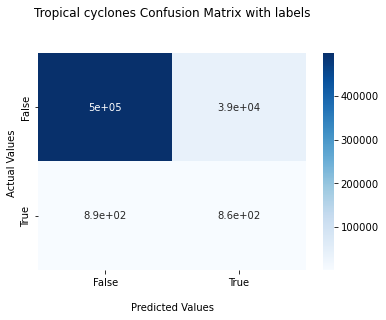

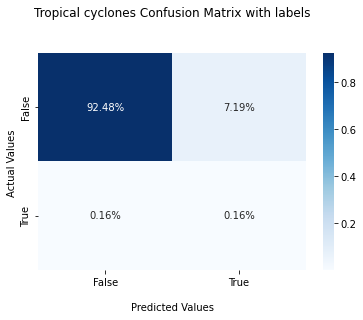

In [8]:
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt


#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_labels_te)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Tropical cyclones Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Tropical cyclones Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Model: ROC AUC=0.744


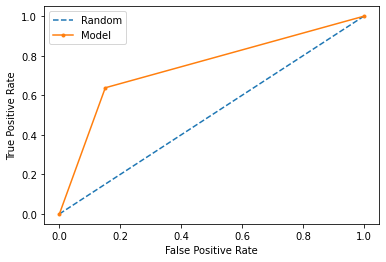

In [48]:
plot_roc_curve(y_test, pred_labels_te_simple)

# Smote


In [6]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import * 


print('Before Smote')

dff = y_training
M = y_training.to_numpy()
# summarize dataset
classes = unique(M)
print(classes)
total = len(M)
for c in classes:
    n_examples = len(M[M==c])
    percent = n_examples / total * 100
    print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))

smt = SMOTE()

X_training_sm, Y_traning_sm = smt.fit_resample(x_training, y_training)

print('After SMOTE')
dff = Y_traning_sm
M = Y_traning_sm.to_numpy()
# summarize dataset
classes = unique(M)
print(classes)
total = len(M)
for c in classes:
    n_examples = len(M[M==c])
    percent = n_examples / total * 100
    print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))

Before Smote
[0. 1.]
> Class=0 : 4254174/4268771 (99.7%)
> Class=1 : 14597/4268771 (0.3%)
After SMOTE
[0. 1.]
> Class=0 : 4254174/8508348 (50.0%)
> Class=1 : 4254174/8508348 (50.0%)


In [17]:
##### Step 5 - Specify the structure of a Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer2'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer3'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer4'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])
model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model.fit(X_training_sm, Y_traning_sm, epochs = 3 ,  validation_data=(x_validation, y_validation))#*********more epochs = 5


Train on 8508348 samples, validate on 688402 samples
Epoch 1/3
8508348/8508348 [==============================] - 2072s 244us/sample - loss: 0.4049 - accuracy: 0.8055 - val_loss: 0.3706 - val_accuracy: 0.8732
Epoch 2/3
8508348/8508348 [==============================] - 1933s 227us/sample - loss: 0.3944 - accuracy: 0.8120 - val_loss: 0.3556 - val_accuracy: 0.8561
Epoch 3/3
8508348/8508348 [==============================] - 1905s 224us/sample - loss: 0.3936 - accuracy: 0.8124 - val_loss: 0.3307 - val_accuracy: 0.8788


In [58]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_complex_400n_4l_SMOTE = (model.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te_complex_400n_4l_SMOTE = (model.predict(x_test)> 0.5).astype(int)
#   > 0.01).astype(int)

##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_complex_400n_4l_SMOTE))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_complex_400n_4l_SMOTE))
print("")


-------------------- Model Summary --------------------
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 8)                 0         
_________________________________________________________________
Hidden-Layer (Dense)         (None, 8)                 72        
_________________________________________________________________
dropout_12 (Dropout)         (None, 8)                 0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  flatten_12
Layer:  Hidden-Layer
Layer:  dropout_12
Layer:  Output-Layer

---------- Evaluation on Training Data ----------


/Users/3rfanian/opt/anaconda3/envs/project_thesis/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/3rfanian/opt/anaconda3/envs/project_thesis/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/3rfanian/opt/anaconda3/envs/project_thesis/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   4254174
         1.0       0.00      0.00      0.00     14597

    accuracy                           1.00   4268771
   macro avg       0.50      0.50      0.50   4268771
weighted avg       0.99      1.00      0.99   4268771


---------- Evaluation on Test Data ----------


/Users/3rfanian/opt/anaconda3/envs/project_thesis/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    537732
         1.0       0.00      0.00      0.00      1755

    accuracy                           1.00    539487
   macro avg       0.50      0.50      0.50    539487
weighted avg       0.99      1.00      1.00    539487




/Users/3rfanian/opt/anaconda3/envs/project_thesis/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/3rfanian/opt/anaconda3/envs/project_thesis/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
dfq = test_set_wt.assign(predict_value=pred_labels_te)
dfq
dfq.to_csv('data_with_newtarget/Predicted_value_Complexmodel_256noodes_4hiddenlayers__SMOTE.csv')  



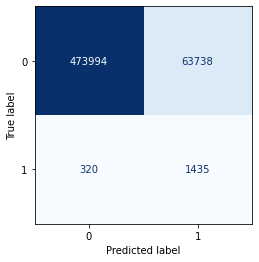

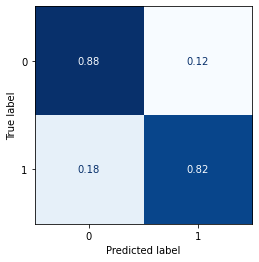

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

In [23]:
# Imports
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# ROC Function
def plot_roc_curve(Y_test, model_probs):

    random_probs = [0 for _ in range(len(Y_test))]
    # calculate AUC
    model_auc = roc_auc_score(Y_test, model_probs)
    # summarize score
    print('Model: ROC AUC=%.3f' % (model_auc))
    # calculate ROC Curve
        # For the Random Model
    random_fpr, random_tpr, _ = roc_curve(Y_test, random_probs)
        # For the actual model
    model_fpr, model_tpr, _ = roc_curve(Y_test, model_probs)
    # Plot the roc curve for the model and the random model line
    plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')
    plt.plot(model_fpr, model_tpr, marker='.', label='Model')
    # Create labels for the axis
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

Model: ROC AUC=0.652


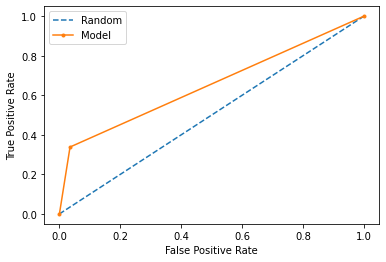

In [59]:
plot_roc_curve(y_test, pred_labels_te)

In [26]:
model.save('ComModel_256n_4l_SMOTE')
model.save('ComModel_256n_4l_SMOTE.h5')

INFO:tensorflow:Assets written to: ComModel_256n_4l_SMOTE/assets


# after nodes256


In [35]:
neee = dfq.groupby(['predict_value']).count()
neee

,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,lsm,newlsm,Tomorrow_lsm
predict_value,,,,,,,,,,,,,,
0.058402,52322,52322,52322,52322,52322,52322,52322,52322,52322,52322,52322,52322,52322,52322
0.058402,162,162,162,162,162,162,162,162,162,162,162,162,162,162
0.058402,294,294,294,294,294,294,294,294,294,294,294,294,294,294
0.058402,32,32,32,32,32,32,32,32,32,32,32,32,32,32
0.058402,98,98,98,98,98,98,98,98,98,98,98,98,98,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.873528,77,77,77,77,77,77,77,77,77,77,77,77,77,77
0.873529,126,126,126,126,126,126,126,126,126,126,126,126,126,126
0.873529,133,133,133,133,133,133,133,133,133,133,133,133,133,133


In [100]:
dfq.to_csv('data_with_newtarget/Predicted_value_SimpleModel_SMOTE.csv')  


[[529910   7822]
 [  1216    539]]


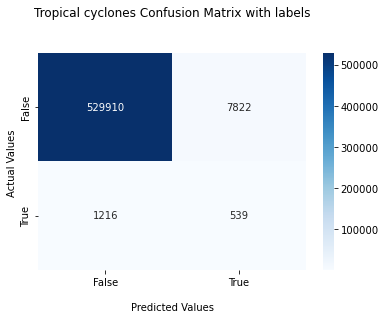

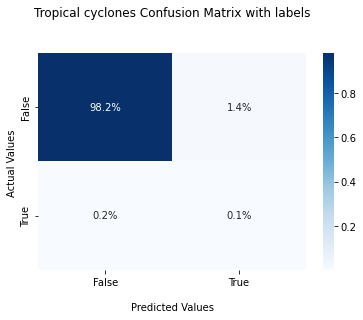

In [86]:

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_labels_te)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Tropical cyclones Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='0.001%', cmap='Blues')

ax.set_title('Tropical cyclones Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

[[412460 125272]
 [   311   1444]]


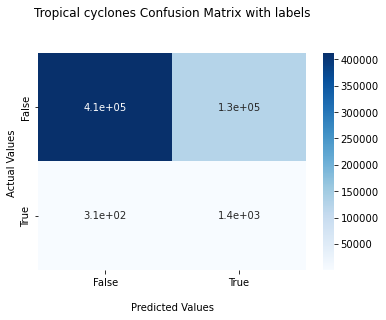

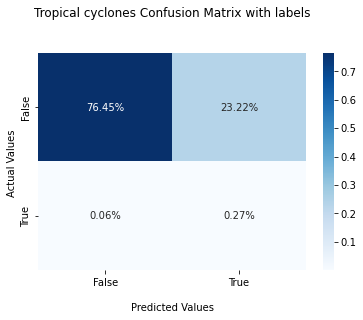

In [72]:

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_labels_te)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Tropical cyclones Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Tropical cyclones Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [87]:
# Imports
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# ROC Function
def plot_roc_curve(Y_test, model_probs):

    random_probs = [0 for _ in range(len(Y_test))]
    # calculate AUC
    model_auc = roc_auc_score(Y_test, model_probs)
    # summarize score
    print('Model: ROC AUC=%.3f' % (model_auc))
    # calculate ROC Curve
        # For the Random Model
    random_fpr, random_tpr, _ = roc_curve(Y_test, random_probs)
        # For the actual model
    model_fpr, model_tpr, _ = roc_curve(Y_test, model_probs)
    # Plot the roc curve for the model and the random model line
    plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')
    plt.plot(model_fpr, model_tpr, marker='.', label='Model')
    # Create labels for the axis
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

Model: ROC AUC=0.646


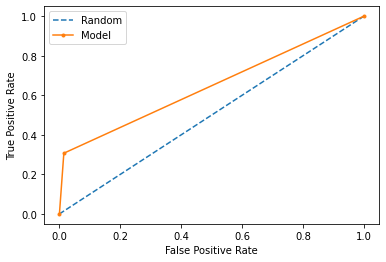

In [88]:
plot_roc_curve(y_test, pred_labels_te)

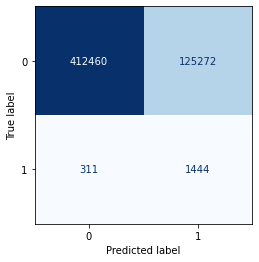

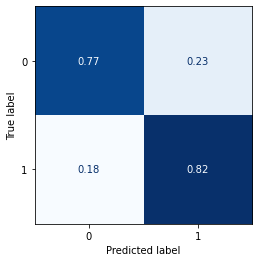

In [96]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

In [103]:
##model with more nodes
##### Step 5 - Specify the structure of a Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(400, activation='tanh', name='Hidden-Layer'),
    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])
model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model.fit(X_training_sm, Y_traning_sm, epochs = 2 ,  validation_data=(x_validation, y_validation))#*********more epochs = 5


Train on 8508348 samples, validate on 688402 samples
Epoch 1/2
8508348/8508348 [==============================] - 1238s 146us/sample - loss: 0.4070 - accuracy: 0.8054 - val_loss: 0.4575 - val_accuracy: 0.7745
Epoch 2/2
8508348/8508348 [==============================] - 1234s 145us/sample - loss: 0.3947 - accuracy: 0.8126 - val_loss: 0.3310 - val_accuracy: 0.8530


In [111]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr = (model.predict(x_training))
# Predict class labels on a test data
pred_labels_te = (model.predict(x_test))
#> 0.01).astype(int)

##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
#print(classification_report(y_training, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
#print(classification_report(y_test, pred_labels_te))
print("")


-------------------- Model Summary --------------------
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 8)                 0         
_________________________________________________________________
Hidden-Layer0 (Dense)        (None, 10)                90        
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 10)                110       
_________________________________________________________________
Hidden-Layer2 (Dense)        (None, 10)                110       
_________________________________________________________________
Hidden-Layer3 (Dense)        (None, 10)                110       
_________________________________________________________________
Hidden-Layer4 (Dense)        (None, 10)                110       
______________________________________________________________

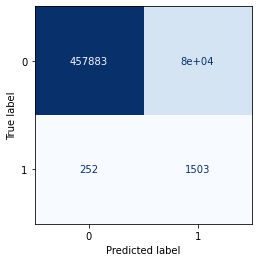

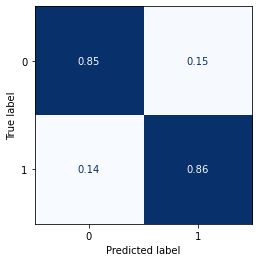

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

Model: ROC AUC=0.897


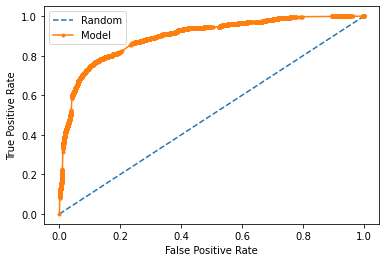

In [112]:
plot_roc_curve(y_test, pred_labels_te)

In [113]:
dfq = test_set_wt.assign(predict_value=pred_labels_te)

dfq.to_csv('data_with_newtarget/Predicted_value_SimpleModel_SMOTE_400nodes&2epochs.csv')  
dfq

,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,lsm,newlsm,Tomorrow_lsm,predict_value
0,2016-01-01,0.0,20.0,0.000011,80.796135,-2.052292,0.008678,4.996910,-1.678764,-272.04962,0.00000,0.0,0.0,0.0,0.203044
1,2016-01-01,0.0,22.5,0.000011,77.748420,-4.445312,0.740505,7.517281,0.792618,-250.63333,0.00000,0.0,0.0,0.0,0.203242
2,2016-01-01,0.0,25.0,-0.000001,71.178825,-3.778427,1.056324,9.333221,0.688252,-229.52519,0.00000,0.0,0.0,0.0,0.203278
3,2016-01-01,0.0,27.5,-0.000005,73.585754,-4.695709,1.236446,9.589882,0.555519,-240.80815,0.00000,0.0,0.0,0.0,0.203145
4,2016-01-01,0.0,30.0,-0.000016,72.382780,-4.002563,0.734211,5.410950,-1.086350,-262.45557,0.00000,0.0,0.0,0.0,0.203044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539482,2019-12-01,-30.0,80.0,0.000006,2.637233,33.277840,5.379345,-0.286896,5.558327,-277.60870,294.14987,0.0,0.0,0.0,0.049964
539483,2019-12-01,-30.0,82.5,-0.000020,23.660923,34.272537,6.438683,-13.026535,2.857349,-270.80573,294.23798,0.0,0.0,0.0,0.049778
539484,2019-12-01,-30.0,85.0,-0.000019,46.051540,35.755882,7.248966,-18.870102,-3.349407,-249.43092,294.26890,0.0,0.0,0.0,0.049763
539485,2019-12-01,-30.0,87.5,-0.000014,55.855648,34.069664,6.349327,-18.801796,-8.172478,-239.36870,294.36630,0.0,0.0,0.0,0.049764


In [117]:
##model with more layers
##### Step 5 - Specify the structure of a Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer0'),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer2'),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer3'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])
model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model.fit(X_training_sm, Y_traning_sm, epochs = 2 ,  validation_data=(x_validation, y_validation))#*********more epochs = 5


Train on 8508348 samples, validate on 688402 samples
Epoch 1/2
8508348/8508348 [==============================] - 592s 70us/sample - loss: 0.4721 - accuracy: 0.7696 - val_loss: 0.5023 - val_accuracy: 0.6647
Epoch 2/2
8508348/8508348 [==============================] - 464s 55us/sample - loss: 0.4641 - accuracy: 0.7701 - val_loss: 0.4248 - val_accuracy: 0.8421


In [118]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr = (model.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (model.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)

##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")


-------------------- Model Summary --------------------
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 8)                 0         
_________________________________________________________________
Hidden-Layer0 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer2 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer3 (Dense)        (None, 8)                 72        
_________________________________________________________________
dropout_16 (Dropout)         (None, 8)                 0         
______________________________________________________________

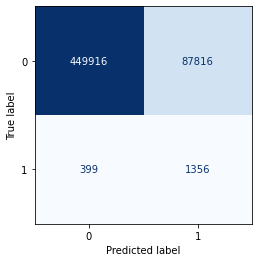

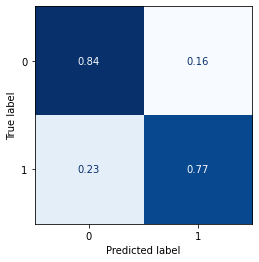

In [119]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

In [7]:
##model with more nodes
##### Step 5 - Specify the structure of a Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(400, activation='tanh', name='Hidden-Layer0'),
    tf.keras.layers.Dense(400, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dense(400, activation='tanh', name='Hidden-Layer2'),
    tf.keras.layers.Dense(400, activation='tanh', name='Hidden-Layer3'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])
model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model.fit(X_training_sm, Y_traning_sm, epochs = 50 ,  validation_data=(x_validation, y_validation))#*********more epochs = 5


2022-06-15 16:53:46.701434: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-15 16:53:46.703198: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 8508348 samples, validate on 688402 samples
Epoch 1/50
 157760/8508348 [..............................] - ETA: 57:15 - loss: 0.4594 - accuracy: 0.7740

KeyboardInterrupt: 

# 400nodes


In [38]:
##model with more nodes
##### Step 5 - Specify the structure of a Neural Network
model_400n = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(400, activation='tanh', name='Hidden-Layer'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])
model_400n.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model_400n.fit(X_training_sm, Y_traning_sm, epochs = 1 ,  validation_data=(x_validation, y_validation))#*********more epochs = 5


Train on 8508348 samples, validate on 688402 samples
8508348/8508348 [==============================] - 1959s 230us/sample - loss: 0.4080 - accuracy: 0.8049 - val_loss: 0.3975 - val_accuracy: 0.8071


In [41]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_400n = (model_400n.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te_400n = (model_400n.predict(x_test)> 0.5).astype(int)
#   > 0.5).astype(int)

##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_400n.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model_400n.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_400n))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_400n))
print("")


-------------------- Model Summary --------------------
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 8)                 0         
_________________________________________________________________
Hidden-Layer (Dense)         (None, 400)               3600      
_________________________________________________________________
dropout_11 (Dropout)         (None, 400)               0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 401       
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  flatten_11
Layer:  Hidden-Layer
Layer:  dropout_11
Layer:  Output-Layer

---------- Evaluation on Training Data ----------

In [67]:
model_400n.save('ComModel_400n_SMOTE')
model_400n.save('ComModel_400n_SMOTE.h5')

INFO:tensorflow:Assets written to: ComModel_400n_SMOTE/assets


In [40]:
dfq = test_set_wt.assign(predict_value=pred_labels_te_400n)
dfq
dfq.to_csv('data_with_newtarget/Predicted_value_simplemodel_400noodes_SMOTE.csv')  



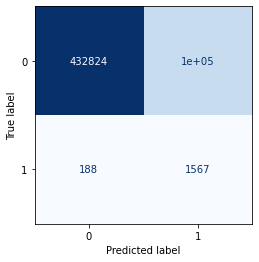

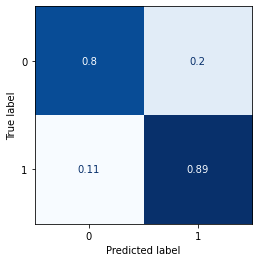

In [42]:

ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_400n)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_400n,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

Model: ROC AUC=0.849


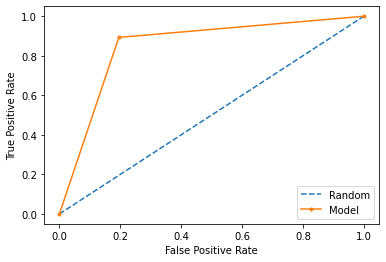

In [43]:
plot_roc_curve(y_test, pred_labels_te_400n)

# simpleSMOTE

In [50]:
##model with more nodes
##### Step 5 - Specify the structure of a Neural Network
model_SimpleSMOTE = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(1, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])
model_SimpleSMOTE.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model_SimpleSMOTE.fit(X_training_sm, Y_traning_sm, epochs = 2 ,  validation_data=(x_validation, y_validation))#*********more epochs = 5


Train on 8508348 samples, validate on 688402 samples
Epoch 1/2
8508348/8508348 [==============================] - 1266s 149us/sample - loss: 0.6003 - accuracy: 0.6702 - val_loss: 0.5290 - val_accuracy: 0.8222
Epoch 2/2
8508348/8508348 [==============================] - 1817s 214us/sample - loss: 0.5822 - accuracy: 0.7028 - val_loss: 0.6517 - val_accuracy: 0.6361


In [54]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_SimpleSMOTE = (model_SimpleSMOTE.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te_SimpleSMOTE = (model_SimpleSMOTE.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)

##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_SimpleSMOTE.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model_SimpleSMOTE.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_SimpleSMOTE))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_SimpleSMOTE))
print("")


-------------------- Model Summary --------------------
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 1)                 9         
_________________________________________________________________
dropout_15 (Dropout)         (None, 1)                 0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 2         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  flatten_15
Layer:  Hidden-Layer1
Layer:  dropout_15
Layer:  Output-Layer

---------- Evaluation on Training Data ----------
    

In [53]:
dfq = test_set_wt.assign(predict_value=pred_labels_te_SimpleSMOTE)
dfq
dfq.to_csv('data_with_newtarget/Predicted_value_SimpleSMOTE.csv')  



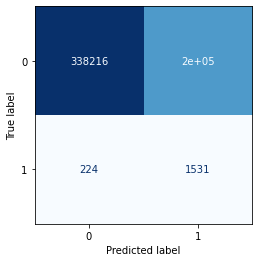

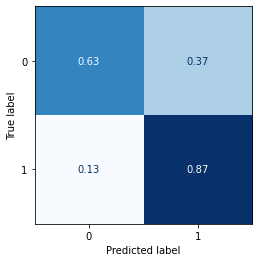

In [55]:

ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_SimpleSMOTE)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_SimpleSMOTE,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

Model: ROC AUC=0.751


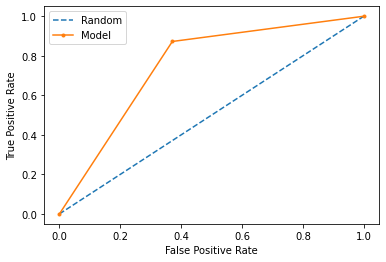

In [56]:
plot_roc_curve(y_test, pred_labels_te_SimpleSMOTE)

In [1]:
new_model = tf.keras.models.load_model('ComModel_256n_4l_SMOTE')

# Check its architecture
new_model.summary()

NameError: name 'tf' is not defined

In [61]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_complex_400n_4l = (new_model.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te_complex_400n_4l = (new_model.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)

##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
new_model.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in new_model.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_complex_400n_4l))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_complex_400n_4l))
print("")


-------------------- Model Summary --------------------
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 256)               2304      
_________________________________________________________________
Hidden-Layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
Hidden-Layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
Hidden-Layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_______________________________________________________________

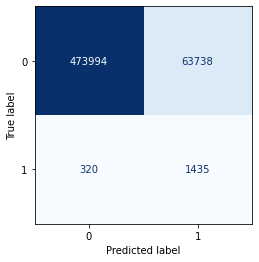

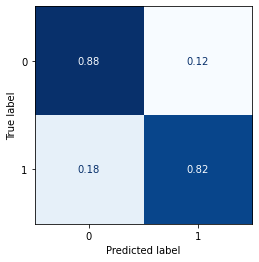

In [62]:

ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_complex_400n_4l)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_complex_400n_4l,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

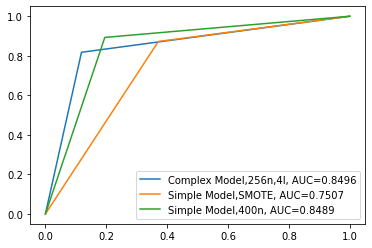

In [66]:
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_complex_400n_4l)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_complex_400n_4l), 4)
plt.plot(fpr,tpr,label="Complex Model,256n,4l, AUC="+str(auc))


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_SimpleSMOTE)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_SimpleSMOTE), 4)
plt.plot(fpr,tpr,label="Simple Model,SMOTE, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_400n)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_400n), 4)
plt.plot(fpr,tpr,label="Simple Model,400n, AUC="+str(auc))



#add legend
plt.legend()

# finfing number of hidden layers


In [12]:

#𝑁ℎ=𝑁𝑠/(𝛼∗(𝑁𝑖+𝑁𝑜)) 
#𝑁𝑖  = number of input neurons.
#𝑁𝑜 = number of output neurons.
#𝑁𝑠 = number of samples in training data set.
#𝛼 = an arbitrary scaling factor usually 2-10.


n_i = 8
n_o = 1
n_s = 4268771
alpha = 10

n_h = n_s / (alpha * (n_i + n_o))
n_h

47430.78888888889

In [18]:
##model with more layers
##### Step 5 - Specify the structure of a Neural Network
model_test = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer0'),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer2'),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer3'),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer4'),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer5'),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer6'),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer7'),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])
model_test.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

checkpoint_filepath = '/tmp/checkpointtest'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

model_test.fit(X_training_sm, Y_traning_sm, epochs = 20,callbacks=[model_checkpoint_callback],  validation_data=(x_validation, y_validation))#*********more epochs = 5


Train on 8508348 samples, validate on 688402 samples
Epoch 1/20
8508348/8508348 [==============================] - 1709s 201us/sample - loss: 0.6181 - accuracy: 0.6356 - val_loss: 0.5634 - val_accuracy: 0.5477
Epoch 2/20
8508348/8508348 [==============================] - 2127s 250us/sample - loss: 0.5567 - accuracy: 0.7230 - val_loss: 0.5670 - val_accuracy: 0.4930
Epoch 3/20
8508348/8508348 [==============================] - 3405s 400us/sample - loss: 0.5579 - accuracy: 0.7277 - val_loss: 0.5750 - val_accuracy: 0.6023
Epoch 4/20
8508348/8508348 [==============================] - 2099s 247us/sample - loss: 0.5526 - accuracy: 0.7413 - val_loss: 0.5574 - val_accuracy: 0.7617
Epoch 5/20
8508348/8508348 [==============================] - 2696s 317us/sample - loss: 0.5468 - accuracy: 0.7420 - val_loss: 0.5422 - val_accuracy: 0.8534
Epoch 6/20
8508348/8508348 [==============================] - 1637s 192us/sample - loss: 0.5465 - accuracy: 0.7432 - val_loss: 0.5339 - val_accuracy: 0.8643
Epoch


-------------------- Model Summary --------------------
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer0 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer2 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer3 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer4 (Dense)        (None, 8)                 72        
_______________________________________________________________

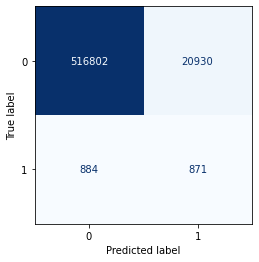

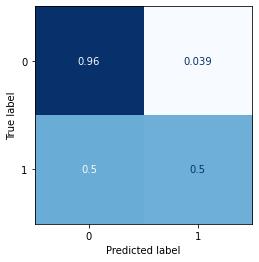

In [16]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_test = (model_test.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te_test = (model_test.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_test.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model_test.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_test))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_test))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_test)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_test,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)




-------------------- Model Summary --------------------
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer0 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer2 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer3 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer4 (Dense)        (None, 8)                 72        
_______________________________________________________________

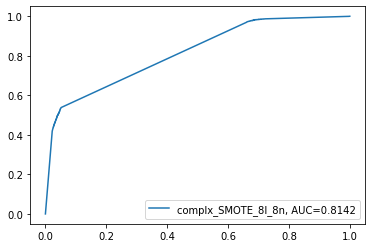

In [17]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_test_prob = (model_test.predict(x_training))
# Predict class labels on a test data
pred_labels_te_test_prob = (model_test.predict(x_test))
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_test.summary() # print model summary
print("")


from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_test_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_test_prob), 4)
plt.plot(fpr,tpr,label="complx_SMOTE_8l_8n, AUC="+str(auc))





#add legend
plt.legend()


-------------------- Model Summary --------------------
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer0 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer2 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer3 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer4 (Dense)        (None, 8)                 72        
_______________________________________________________________

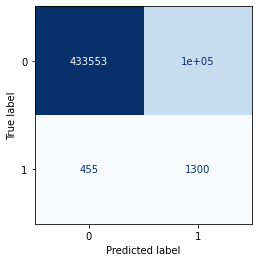

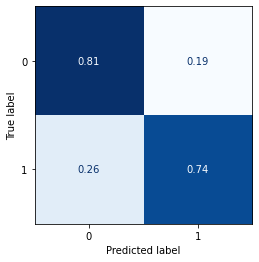

In [19]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_test = (model_test.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te_test = (model_test.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_test.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model_test.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_test))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_test))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_test)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_test,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)




-------------------- Model Summary --------------------
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer0 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer2 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer3 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer4 (Dense)        (None, 8)                 72        
_______________________________________________________________

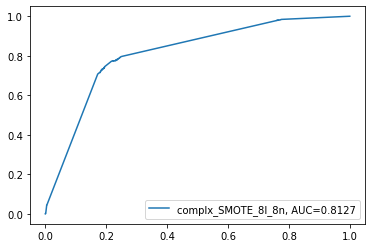

In [23]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_test_prob = (model_test.predict(x_training))
# Predict class labels on a test data
pred_labels_te_test_prob = (model_test.predict(x_test))
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_test.summary() # print model summary
print("")


from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_test_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_test_prob), 4)
plt.plot(fpr,tpr,label="complx_SMOTE_8l_8n, AUC="+str(auc))





#add legend
plt.legend()

In [20]:
##model with more layers
##### Step 5 - Specify the structure of a Neural Network
model_test2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer0'),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer2'),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer3'),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer4'),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer5'),


    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])
model_test2.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

checkpoint_filepath = '/tmp/checkpointtest2'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

model_test2.fit(X_training_sm, Y_traning_sm, epochs = 20,callbacks=[model_checkpoint_callback],  validation_data=(x_validation, y_validation))#*********more epochs = 5


Train on 8508348 samples, validate on 688402 samples
Epoch 1/20
8508348/8508348 [==============================] - 1158s 136us/sample - loss: 0.4696 - accuracy: 0.7735 - val_loss: 0.3956 - val_accuracy: 0.8874
Epoch 2/20
8508348/8508348 [==============================] - 1066s 125us/sample - loss: 0.4618 - accuracy: 0.7799 - val_loss: 0.4554 - val_accuracy: 0.8274
Epoch 3/20
8508348/8508348 [==============================] - 615s 72us/sample - loss: 0.4623 - accuracy: 0.7804 - val_loss: 0.4220 - val_accuracy: 0.8551
Epoch 4/20
8508348/8508348 [==============================] - 932s 110us/sample - loss: 0.4586 - accuracy: 0.7838 - val_loss: 0.4509 - val_accuracy: 0.8168
Epoch 5/20
8508348/8508348 [==============================] - 815s 96us/sample - loss: 0.4581 - accuracy: 0.7849 - val_loss: 0.4840 - val_accuracy: 0.7564
Epoch 6/20
8508348/8508348 [==============================] - 660s 78us/sample - loss: 0.4573 - accuracy: 0.7869 - val_loss: 0.4511 - val_accuracy: 0.8333
Epoch 7/20
8


-------------------- Model Summary --------------------
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer0 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer2 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer3 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer4 (Dense)        (None, 8)                 72        
_______________________________________________________________

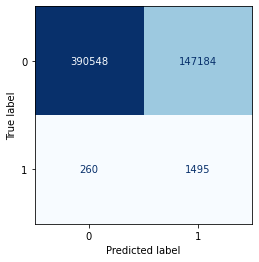

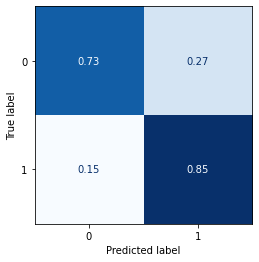

In [21]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_test2 = (model_test2.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te_test2 = (model_test2.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_test2.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model_test2.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_test2))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_test2))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_test2)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_test2,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)




-------------------- Model Summary --------------------
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer0 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer2 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer3 (Dense)        (None, 8)                 72        
_________________________________________________________________
Hidden-Layer4 (Dense)        (None, 8)                 72        
_______________________________________________________________

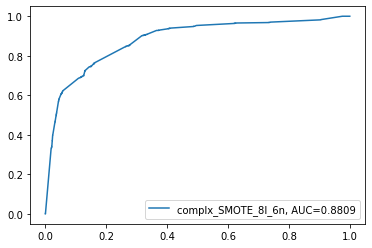

In [22]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_test2_prob = (model_test2.predict(x_training))
# Predict class labels on a test data
pred_labels_te_test2_prob = (model_test2.predict(x_test))
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_test2.summary() # print model summary
print("")


from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_test2_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_test2_prob), 4)
plt.plot(fpr,tpr,label="complx_SMOTE_8l_6n, AUC="+str(auc))





#add legend
plt.legend()